### IMEC2543 - DINAMICA DE MAQUINARIA
### [Luis Alejandro Rodríguez Arenas](https://luigitoby.github.io/) Cod. 202321287
# Taller 1

In [1]:
import numpy as np
from numpy import deg2rad, rad2deg
from sympy import symbols, pi, sin, cos, lambdify, solve, linear_eq_to_matrix, simplify, acos, sqrt
from sympy.physics.mechanics import ReferenceFrame, dynamicsymbols, express
from scipy import optimize
from scipy.optimize import fsolve
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Paso -1 - Hacer los dibujos y diagramas necesarios


# Paso 0 -  Establecer variables
Vamos a establecer las variables que necesitaremos a lo largo del ejercicio

In [2]:
l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, mJ, mK, mL, mM, mN, mO, mP, mQ, g, t = symbols('l1 l2 l3 l4 l5 l6 l7 l8 l9 l10 mJ mK mL mM mN mO mP mQ g t')

theta1, theta2, theta3, theta4, theta5, theta6, theta7, theta8 = dynamicsymbols('theta1 theta2 theta3 theta4 theta5 theta6 theta7 theta8')

# FOAx, FABx, FBCx, FDCx, FOAy, FABy, FBCy, FDCy, Finx, Min, FODy, M_pris = symbols('F_OAx F_ABx F_BCx F_DCx F_OAy F_ABy F_BCy F_DCy F_inx M_in F_ODx M_pris')
params={l1: 0.035, l2: 0.08, l3: 0.08, l4: 0.035, l5: 0.02, l6: 0.02, l7: 0.04, l8: 0.046254, l9: 0.01723, l10: 0.0361, mJ: 1, mK: 1, mL: 1, mM: 1, mN: 1, mO: 1, mP: 1, mQ: 1, g: 9.81}

T=ReferenceFrame('T')

J=T.orientnew('J','Axis',(theta1,T.z))
K=T.orientnew('K','Axis',(theta2,T.z))
L=T.orientnew('L','Axis',(theta3,T.z))
M=T.orientnew('M','Axis',(theta4,T.z))
N=T.orientnew('N','Axis',(theta5,T.z))
O=T.orientnew('O','Axis',(theta6,T.z))
P=T.orientnew('P','Axis',(theta7,T.z))
Q=T.orientnew('Q','Axis',(theta8,T.z))

V=N.orientnew('V','Axis',(deg2rad(95),N.z))

# W=N.orientnew('W','Axis',(-deg2rad(25.515),N.z))

rAB = l2*J.x
rAC = l1*K.x
rCD = l3*L.x
############
rBD = l4*P.x
rIB = l3*P.x
############
rIH = l5*Q.x
rHG = l3*O.x
############
rBF = l7*N.x
# rGF = l8*W.x
rBG = l6*V.x
##########
rEF = l3*M.x
rAE = l10*T.x+l9*T.y

eqLoop1 = rAB+rBD-rCD-rAC
eqLoop2 = rAB+rBF-rEF-rAE
eqLoop3 = -rIB+rIH+rHG-rBG

eqLoop1 = eqLoop1.subs(params)
eqLoop2 = eqLoop2.subs(params)
eqLoop3 = eqLoop3.subs(params)

### Pequeño código para verificar gráficamente que los loops cierran

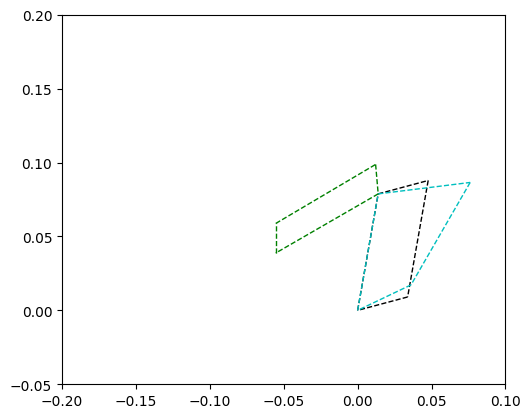

In [3]:
points={'A': 0*T.x, 'B': rAB, 'C': rAC, 'D': rAC+rCD, 'E': rAE, 'F': rAE+rEF, 'G': rAB+rBG, 'H': rAB-rIB+rIH, 'I': rAB-rIB}
points_fun={k:lambdify([theta1,theta2,theta3,theta4,theta5,theta6,theta7,theta8],[v.dot(T.x).subs(params),v.dot(T.y).subs(params)]) for k,v in points.items()}

def plotMechanism(joint_values,ax=None):    
    A=points_fun['A'](*joint_values) # Operador de unpacking, es decir, toma la lista de joint_values y los pasa como argumentos a la función de cada punto
    B=points_fun['B'](*joint_values)
    C=points_fun['C'](*joint_values)
    D=points_fun['D'](*joint_values)
    E=points_fun['E'](*joint_values)
    F=points_fun['F'](*joint_values)
    G=points_fun['G'](*joint_values)
    H=points_fun['H'](*joint_values)
    I=points_fun['I'](*joint_values)    

    if ax is None:
        ax=plt.figure().add_subplot(111)
        # -------- DRAW LOOP 1 --------
    # A -> B -> D -> C -> A
    ax.plot([A[0], B[0]], [A[1], B[1]], 'k--', linewidth=1)
    ax.plot([B[0], D[0]], [B[1], D[1]], 'k--', linewidth=1)
    ax.plot([D[0], C[0]], [D[1], C[1]], 'k--', linewidth=1)
    ax.plot([C[0], A[0]], [C[1], A[1]], 'k--', linewidth=1)

    # -------- DRAW LOOP 2 --------
    # A -> B -> F -> E -> A
    ax.plot([A[0], B[0]], [A[1], B[1]], 'c--', linewidth=1)
    ax.plot([B[0], F[0]], [B[1], F[1]], 'c--', linewidth=1)
    ax.plot([F[0], E[0]], [F[1], E[1]], 'c--', linewidth=1)
    ax.plot([E[0], A[0]], [E[1], A[1]], 'c--', linewidth=1)

    # -------- DRAW LOOP 3 --------
    # B -> I -> H -> G -> B
    ax.plot([B[0], I[0]], [B[1], I[1]], 'g--', linewidth=1)
    ax.plot([I[0], H[0]], [I[1], H[1]], 'g--', linewidth=1)
    ax.plot([H[0], G[0]], [H[1], G[1]], 'g--', linewidth=1)
    ax.plot([G[0], B[0]], [G[1], B[1]], 'g--', linewidth=1)

    ax.set_aspect('equal')
    ax.set_xlim(-0.2,0.1)
    ax.set_ylim(-0.05,0.2)

# Chekeo rápido para ver si funciona la función de plot
plotMechanism([np.deg2rad(80),np.deg2rad(15),np.deg2rad(80),np.deg2rad(60),np.deg2rad(0),np.deg2rad(30),np.deg2rad(30),np.deg2rad(90)])


In [4]:
BF = rBF.subs(params)
BG = rBG.subs(params)

angle = acos(
    (BF.dot(BG)) / (sqrt(BF.dot(BF)) * sqrt(BG.dot(BG)))
)

angle = simplify(angle)

display(angle)

rad2deg(float(angle))

1.65806278939461

np.float64(95.0)

In [5]:
eqs = [
    eqLoop1.dot(T.x),
    eqLoop1.dot(T.y),
    eqLoop2.dot(T.x),
    eqLoop2.dot(T.y),
    eqLoop3.dot(T.x),
    eqLoop3.dot(T.y)
]

eqs_fun = lambdify(
    (theta1, theta2, theta3, theta4, theta5, theta6, theta7, theta8),
    eqs,
    modules="numpy"
)

# Paso 1  - FK
Como hemos visto en clase el paso 1 es realizar el FK del mecanísmo, pues este nos permitirá en el futuro determinar la posición final del efector daondole los valores de valores de $\theta$, $\dot{\theta}$ y $\dot{\theta}$ 

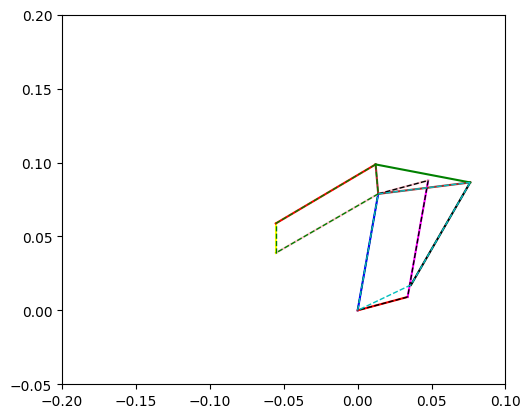

In [6]:
points={'A': 0*T.x, 'B': rAB, 'C': rAC, 'D': rAC+rCD, 'E': rAE, 'F': rAE+rEF, 'G': rAB+rBG, 'H': rAB-rIB+rIH, 'I': rAB-rIB}
points_fun={k:lambdify([theta1,theta2,theta3,theta4,theta5,theta6,theta7,theta8],[v.dot(T.x).subs(params),v.dot(T.y).subs(params)]) for k,v in points.items()}

def plotMechanism(joint_values,ax=None):    
    A=points_fun['A'](*joint_values) # Operador de unpacking, es decir, toma la lista de joint_values y los pasa como argumentos a la función de cada punto
    B=points_fun['B'](*joint_values)
    C=points_fun['C'](*joint_values)
    D=points_fun['D'](*joint_values)
    E=points_fun['E'](*joint_values)
    F=points_fun['F'](*joint_values)
    G=points_fun['G'](*joint_values)
    H=points_fun['H'](*joint_values)
    I=points_fun['I'](*joint_values)    

    if ax is None:
        ax=plt.figure().add_subplot(111)
    ax.plot([A[0],B[0]], [A[1],B[1]], 'BLUE')
    ax.plot([A[0],C[0]], [A[1],C[1]], 'red')
    ax.plot([C[0],D[0]], [C[1],D[1]], 'magenta')
    ax.plot([B[0],D[0]], [B[1],D[1]], 'pink')
    ax.plot([B[0],I[0]], [B[1],I[1]], 'pink')
    ax.plot([I[0],H[0]], [I[1],H[1]], 'yellow')
    ax.plot([H[0],G[0]], [H[1],G[1]], 'red')
    ax.plot([B[0],G[0]], [B[1],G[1]], 'brown')
    ax.plot([E[0],F[0]], [E[1],F[1]], 'black') 
    ax.plot([B[0],F[0]], [B[1],F[1]], 'brown')
    ax.plot([G[0],F[0]], [G[1],F[1]], 'green')
    
        # -------- DRAW LOOP 1 --------
    # A -> B -> D -> C -> A
    ax.plot([A[0], B[0]], [A[1], B[1]], 'k--', linewidth=1)
    ax.plot([B[0], D[0]], [B[1], D[1]], 'k--', linewidth=1)
    ax.plot([D[0], C[0]], [D[1], C[1]], 'k--', linewidth=1)
    ax.plot([C[0], A[0]], [C[1], A[1]], 'k--', linewidth=1)

    # -------- DRAW LOOP 2 --------
    # A -> B -> F -> E -> A
    ax.plot([A[0], B[0]], [A[1], B[1]], 'c--', linewidth=1)
    ax.plot([B[0], F[0]], [B[1], F[1]], 'c--', linewidth=1)
    ax.plot([F[0], E[0]], [F[1], E[1]], 'c--', linewidth=1)
    ax.plot([E[0], A[0]], [E[1], A[1]], 'c--', linewidth=1)

    # -------- DRAW LOOP 3 --------
    # B -> I -> H -> G -> B
    ax.plot([B[0], I[0]], [B[1], I[1]], 'g--', linewidth=1)
    ax.plot([I[0], H[0]], [I[1], H[1]], 'g--', linewidth=1)
    ax.plot([H[0], G[0]], [H[1], G[1]], 'g--', linewidth=1)
    ax.plot([G[0], B[0]], [G[1], B[1]], 'g--', linewidth=1)

    ax.set_aspect('equal')
    ax.set_xlim(-0.2,0.1)
    ax.set_ylim(-0.05,0.2)

# Chekeo rápido para ver si funciona la función de plot
plotMechanism([np.deg2rad(80),np.deg2rad(15),np.deg2rad(80),np.deg2rad(60),np.deg2rad(0),np.deg2rad(30),np.deg2rad(30),np.deg2rad(90)])


### Nota sobre el dibujo de arriba
En este las proporciones estan locas porque puse los angulos a ojo para ver cual podría ser un buen first guess, entonces que no cunda el pánico.

In [7]:
def FK(theta1_val, theta2_val, guess):
    """
    Resuelve la cinemática directa encontrando los ángulos desconocidos
    que minimizan el error de cierre geométrico.
    
    theta1_val, theta2_val  -> DOF impuestos
    guess                   -> estimación inicial de [theta3,...,theta8]
    """

    # -------------------------------------------------
    # 1) Definimos el RESIDUAL (error geométrico)
    # -------------------------------------------------
    def residual(theta_u):
        theta3, theta4, theta5, theta6, theta7, theta8 = theta_u
        
        r = eqs_fun(
            theta1_val,
            theta2_val,
            theta3,
            theta4,
            theta5,
            theta6,
            theta7,
            theta8
        )
        
        return np.array(r, dtype=float)

    # -------------------------------------------------
    # 2) Definimos el COSTO escalar = ||r||^2
    # -------------------------------------------------
    def cost(theta_u):
        r = residual(theta_u)
        return np.dot(r, r)   # suma de cuadrados

    # -------------------------------------------------
    # 3) Minimizamos el costo
    # -------------------------------------------------
    result = minimize(
        cost,
        x0=guess,
        method='BFGS',
        options={
            'maxiter': 10000,
            'gtol': 1e-8,
            'disp': True   # para VER la iteración
        }
    )

    # -------------------------------------------------
    # 4) Verificamos convergencia
    # -------------------------------------------------
    if not result.success:
        print("No convergió.")
        print("Costo final:", result.fun)
        raise RuntimeError(result.message)

    print("Convergió.")
    print("Costo final:", result.fun)
    print("Norma residual:", np.sqrt(result.fun))

    return result.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 58
         Function evaluations: 427
         Gradient evaluations: 61
Convergió.
Costo final: 1.1490635928890586e-14
Norma residual: 1.0719438384957762e-07


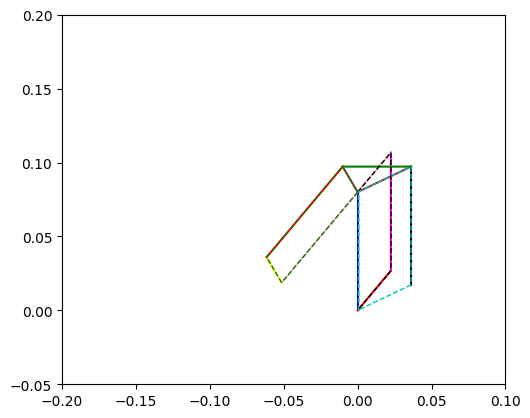

In [8]:
theta1_val = np.deg2rad(90)
theta2_val = np.deg2rad(50)

guess = [
    np.deg2rad(30),
    np.deg2rad(30),
    np.deg2rad(30),
    np.deg2rad(30),
    np.deg2rad(30),
    np.deg2rad(90)
]

theta_u_sol = FK(theta1_val, theta2_val, guess)

joint_values = [theta1_val, theta2_val, *theta_u_sol]
plotMechanism(joint_values)
plt.show()

# Paso 1.1  - Animación del mecanismo
Ahora que tenemos un código sólido donde es claro que el mecanismo cierra, ¡Podemos proceder a animarlo!

In [9]:
tList = np.linspace(0, 2*np.pi, 120)

In [10]:
# Movimiento del motor 2, con motor 1 en 90
tList = np.linspace(0, 2*np.pi, 120)

def theta1_traj(t):
    return np.deg2rad(90)          # fijo (cámbialo si quieres)

def theta2_traj(t):
    return np.deg2rad(180 * t / (2*np.pi))

In [11]:
# Movimiento del motor 1 y motor 2 a la par
def theta1_traj(t):
    return np.deg2rad(90 + 10*np.sin(2*t))

def theta2_traj(t):
    return np.deg2rad(45 + 45*np.sin(t))

In [12]:
# Movimiento más realista de ambos motores 
# ---------------- TRAJECTORIA DEFINIDA ----------------
tList = np.linspace(0, 2*np.pi, 150)

# Brazo 1: lento, gran recorrido (90° → 160°)
def theta1_traj(t):
    theta_min = np.deg2rad(90)
    theta_max = np.deg2rad(160)
    return theta_min + (theta_max - theta_min) * 0.5 * (1 - np.cos(0.5 * t))

# Brazo 2: rápido, menor recorrido (0° → 90°)
def theta2_traj(t):
    theta_min = np.deg2rad(0)
    theta_max = np.deg2rad(90)
    return theta_min + (theta_max - theta_min) * 0.5 * (1 - np.cos(t))
# -----------------------------------------------------

In [13]:
# Movimiento de Sergio (No hablamos de Sergio desde el incidente)
# ---------------- TRAJECTORIA DEFINIDA ----------------
tList = np.linspace(0, 2*np.pi, 150)

# Brazo 1: lento, gran recorrido (90° → 160°)
def theta2_traj(t):
    return np.deg2rad(0)          # fijo (cámbialo si quieres)

# Brazo 2: rápido, menor recorrido (0° → 90°)
def theta1_traj(t):
    return deg2rad(90) + deg2rad(10)*np.sin(deg2rad(360)*t/3)
# -----------------------------------------------------

In [14]:
theta_u_hist = []

# guess inicial (muy importante que cierre bien)
theta_u0 = np.deg2rad([80, 60, 0, 30, 30, 90])

for i, t in enumerate(tList):
    theta1_val = theta1_traj(t)
    theta2_val = theta2_traj(t)

    theta_u_sol = FK(theta1_val, theta2_val, theta_u0)

    theta_u_hist.append(theta_u_sol)
    theta_u0 = theta_u_sol   # continuation 🔑

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 58
         Function evaluations: 427
         Gradient evaluations: 61
Convergió.
Costo final: 3.021012318676818e-16
Norma residual: 1.738105957264061e-08
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 50
         Function evaluations: 385
         Gradient evaluations: 55
Convergió.
Costo final: 6.64428741596159e-14
Norma residual: 2.5776515311348024e-07
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 50
         Function evaluations: 385
         Gradient evaluations: 55
Convergió.
Costo final: 4.83648829776301e-14
Norma residual: 2.1992017410330983e-07
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 50
         Function evaluations: 385
         Gradient evaluations: 55
Convergió.
Costo final: 3.750817133446583e-14
Norma resi

In [15]:
from matplotlib.patches import Arc

def plotMechanismTrans(joint_values, ax=None):

    if ax is None:
        ax = plt.figure().add_subplot(111)

    # ---- Dibujar mecanismo normal ----
    plotMechanism(joint_values, ax)

    # ---- Obtener puntos necesarios ----
    A = np.array(points_fun['A'](*joint_values))
    B = np.array(points_fun['B'](*joint_values))
    D = np.array(points_fun['D'](*joint_values))

    # ---- Vectores en la unión B (Servo 1) ----
    BA = A - B
    BD = D - B

    # ---- Ángulo de transmisión (producto punto) ----
    mu1 = np.arccos(
        np.dot(BA, BD) /
        (np.linalg.norm(BA) * np.linalg.norm(BD))
    )

    mu1_deg = np.degrees(mu1)

    # ---- Ángulos absolutos respecto a eje x ----
    ang_BA = np.degrees(np.arctan2(BA[1], BA[0])) % 360
    ang_BD = np.degrees(np.arctan2(BD[1], BD[0])) % 360

    ang_start = min(ang_BA, ang_BD)
    ang_end   = max(ang_BA, ang_BD)

    # ---- Dibujar arco ----
    arc_radius = 0.015

    arc = Arc(
        B,
        width=2*arc_radius,
        height=2*arc_radius,
        angle=0,
        theta1=ang_start,
        theta2=ang_end,
        color="blue",
        linewidth=2
    )

    ax.add_patch(arc)

    # ---- Mostrar valor numérico ----
    ax.text(
        B[0] + 0.005,
        B[1] + 0.005,
        rf"$\mu_1={mu1_deg:.1f}^\circ$",
        color="blue",
        fontsize=10
    )

    return mu1_deg

In [16]:
def plotMechanismTrans2(joint_values, ax=None):
    
    if ax is None:
        ax = plt.figure().add_subplot(111)

    # 1️⃣ Dibujar mecanismo normal
    plotMechanism(joint_values, ax)

    A = np.array(points_fun['A'](*joint_values))
    B = np.array(points_fun['B'](*joint_values))
    D = np.array(points_fun['D'](*joint_values))
    # 3️⃣ Calcular vectores en la unión del servo
    BA = A - B
    BD = D - B

    ang_BA = np.arctan2(BA[1], BA[0])
    ang_BD = np.arctan2(BD[1], BD[0])

    # Diferencia angular firmada (clave para que no salte)
    delta = np.arctan2(
        np.sin(ang_BD - ang_BA),
        np.cos(ang_BD - ang_BA)
    )

    mu = abs(delta)
    mu_deg = np.degrees(mu)

    # 4️⃣ Dibujar arco
    from matplotlib.patches import Arc

    arc_radius = 0.025

    arc = Arc(
        B,
        width=2*arc_radius,
        height=2*arc_radius,
        angle=0,
        theta1=np.degrees(ang_BA),
        theta2=np.degrees(ang_BA + delta),
        color='blue',
        linewidth=2
    )

    ax.add_patch(arc)

    # 5️⃣ Mostrar valor en grados
    ax.text(
        B[0] + 0.01,
        B[1] + 0.01,
        rf"$\mu_1={mu_deg:.1f}^\circ$",
        color='blue',
        fontsize=10
    )

    return mu_deg

In [17]:
def plotMechanismTrans3(joint_values, ax):

    # 1️⃣ Dibuja mecanismo + μ₁
    plotMechanismTrans2(joint_values, ax)

    # 2️⃣ Puntos relevantes
    A = np.array(points_fun['A'](*joint_values))
    C = np.array(points_fun['C'](*joint_values))
    D = np.array(points_fun['D'](*joint_values))

    # 3️⃣ Vectores del servo 2 (EN C)
    CA = A - C
    CD = D - C

    ang_CA = np.arctan2(CA[1], CA[0])
    ang_CD = np.arctan2(CD[1], CD[0])

    delta = np.arctan2(
        np.sin(ang_CD - ang_CA),
        np.cos(ang_CD - ang_CA)
    )

    mu2 = abs(delta)
    mu2_deg = np.degrees(mu2)

    from matplotlib.patches import Arc

    r = 0.022  # radio del arco

    arc = Arc(
        (C[0], C[1]),
        2*r, 2*r,
        angle=0,
        theta1=np.degrees(ang_CA),
        theta2=np.degrees(ang_CA + delta),
        color='darkred',
        lw=2
    )

    ax.add_patch(arc)

    ax.text(
        C[0] + 0.01,
        C[1] + 0.01,
        rf"$\mu_2={mu2_deg:.1f}^\circ$",
        fontsize=10,
        color='darkred'
    )

In [18]:
def plotMechanismTrans4(joint_values, ax):

    # 1️⃣ Dibuja mecanismo + μ₁
    plotMechanismTrans2(joint_values, ax)

    # 2️⃣ Puntos relevantes
    A = np.array(points_fun['A'](*joint_values))
    C = np.array(points_fun['C'](*joint_values))
    D = np.array(points_fun['D'](*joint_values))

    # 3️⃣ Vectores del servo 2 (EN C)
    CA = A - C
    CD = D - C

    ang_CA = np.arctan2(CA[1], CA[0])
    ang_CD = np.arctan2(CD[1], CD[0])

    delta = np.arctan2(
        np.sin(ang_CD - ang_CA),
        np.cos(ang_CD - ang_CA)
    )

    mu2 = abs(delta)
    mu2_deg = np.degrees(mu2)

    from matplotlib.patches import Arc

    r = 0.022  # radio del arco

    cross = CA[0]*CD[1] - CA[1]*CD[0]

    # Definir theta1 y theta2 antes
    if cross < 0:
        theta1 = np.degrees(ang_CA + delta)
        theta2 = np.degrees(ang_CA)
    else:
        theta1 = np.degrees(ang_CA)
        theta2 = np.degrees(ang_CA + delta)

    from matplotlib.patches import Arc

    arc = Arc(
        (C[0], C[1]),
        2*r,
        2*r,
        angle=0,
        theta1=theta1,
        theta2=theta2,
        color='darkred',
        lw=2
    )

    ax.add_patch(arc)

    ax.text(
        C[0] + 0.01,
        C[1] + 0.01,
        rf"$\mu_2={mu2_deg:.1f}^\circ$",
        fontsize=10,
        color='darkred'
    )

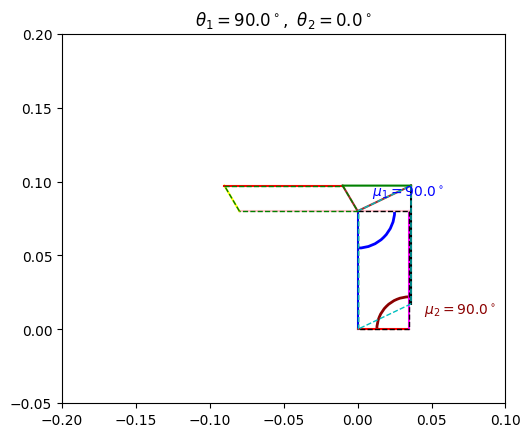

In [19]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

def update(i):
    ax.clear()

    theta1_val = theta1_traj(tList[i])
    theta2_val = theta2_traj(tList[i])
    theta_u_val = theta_u_hist[i]

    joint_values = [
        theta1_val,
        theta2_val,
        *theta_u_val
    ]

    plotMechanismTrans4(joint_values, ax)

    ax.set_title(
        rf"$\theta_1={np.rad2deg(theta1_val):.1f}^\circ,\ "
        rf"\theta_2={np.rad2deg(theta2_val):.1f}^\circ$"
    )

anim = animation.FuncAnimation(
    fig,
    update,
    frames=len(tList),
    interval=80,
    repeat=False
)

In [23]:
# Esto es para correr la animación en el notebook
from IPython.display import HTML
HTML(anim.to_jshtml())

In [21]:
# Esto es para guardarlo en .gif
# anim.save("mechanism.gif", writer="pillow", fps=15)

In [22]:
# Esto es para guardarlo en .mp4
# anim.save("mechanism.mp4", writer="ffmpeg",fps=30)

# Paso 2 - Dinámica Inversa
En dinámica las incognitas son los momentos y fuerzas, por la cantidad de cuerpos (4) podemos entonces encontar 12 ecuaciones en el sistema, las cuales tenemos que escribir.

In [ ]:
points={'A': 0*T.x, 'B': rAB, 'C': rAC, 'D': rAC+rCD, 'E': rAE, 'F': rAE+rEF, 'G': rAB+rBG, 'H': rAB-rIB+rIH, 'I': rAB-rIB}

com = {'J': rAB/2,

    'K': rAC/2,
    'L': rAC+(rCD/2),
    'M': rAE+(rEF/2), 
    'N': rAB+(rBF/3)+(rBG/3),
    'O': rAB-rIB+rIH+(rHG/2),
    'P': rAC+rCD+(-(rBD+rIB)/2),
    'Q': rAB-rIB+(rIH/2),
    }

  

'''

  

acc_old = {

    'J': com['J'].diff(t, T).diff(t, T),

    'K': com['K'].diff(t, T).diff(t, T),

    'L': com['L'].diff(t, T).diff(t, T),

    'M': com['M'].diff(t, T).diff(t, T),

    'N': com['N'].diff(t, T).diff(t, T),

    'O': com['O'].diff(t, T).diff(t, T),

    'P': com['P'].diff(t, T).diff(t, T),

    'Q': com['Q'].diff(t, T).diff(t, T)

}

  

'''

  

acc = {

    k: v.express(T).diff(t, T).diff(t, T)

    for k, v in com.items()

}

  

com_fun = {

    k: lambdify(

        [theta1,theta2,theta3,theta4,theta5,theta6,theta7,theta8],

        [v.dot(T.x).subs(params), v.dot(T.y).subs(params)],

        modules="numpy"

    )
    for k, v in com.items()
}
